In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
import os, sys
sys.path.append('..')
from maps import *
from glob import glob
import json
from utils import *
import numpy as np

In [3]:
# with open('stop_')
# https://bustime.mta.info/api/search?callback=jsonp1554258123549&_=1554258146233&q=401842
sfiles = glob('../data/safe_stopcodes/*')
all_stops = {}
for fl in sfiles:
    with open(fl) as fl:
        stops = fl.read().split('\n')
    for st in stops:
        all_stops[st] = True
all_stops = list(all_stops.keys())

print(len(all_stops))
apicall = 'https://bustime.mta.info/api/search?callback=jsonp1554258123549&_=1554258146233&q='
with open('../mta_stopinfo.sh', 'w') as fl:
    fl.write('#!/bin/bash\n\n')
    for si, stop in enumerate(all_stops):
        fl.write('echo "%d/%d"\n' % (si, len(all_stops)))
        fl.write('wget -O data/mta_json/%s.txt "%s%s"\n' % (stop, apicall, stop))
        fl.write('sleep 1s\n')
#         break
    
        
# len(sfiles)

1098


In [90]:
txtfiles = glob('../data/mta_json/*.txt')
print(len(txtfiles))
locs = {}
for fname in txtfiles:
    stop = fname.split('/')[-1][:-4]
    with open(fname) as fl:
        raw = fl.read()
    raw = '('.join(raw.split('(')[1:])
    raw = ')'.join(raw.split(')')[:-1])
    obj = json.loads(raw)
    if obj['searchResults'] is None or not len(obj['searchResults']['matches']):
        print('Not found:', stop)
        continue
    result = obj['searchResults']['matches'][0]
    lat = result['latitude']
    lng = result['longitude']
    
    locs[stop] = [lat, lng]
    
with open('../data/stop_coords.json', 'w') as fl:
    json.dump(locs, fl, indent=4)
#     print(lat, lng)
#     print(obj)
#     assert False

1098
Not found: 903210
Not found: 903108
Not found: 404021


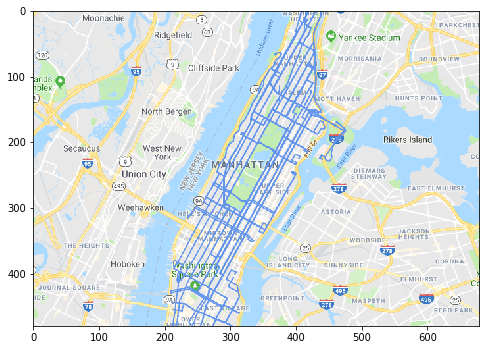

In [4]:
from maps import *
map_manh('demo', zoom=12, show=True)

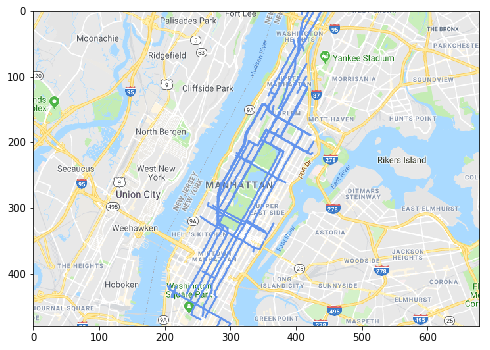

In [98]:
with open('../data/man.json') as fl:
    vs, adj = json.load(fl)

map_graph('manh', vs, adj, opacity=0, edge=3, show=True)

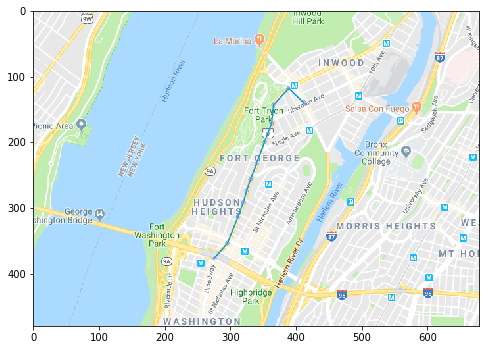

In [100]:
sample = '402620-403295'
hops = 5
vs, adj = read_graph('../data/graphs/%s_n%d.json' % (sample, hops), named_adj=True, verbose=False)
map_graph('demo', vs, adj, zoom=14, show=True)

In [48]:
from urllib3.exceptions import *
# from colorsys import rgb_to_hsv as r2h
# from colorsys import hsv_to_rgb as h2r
from parula import *

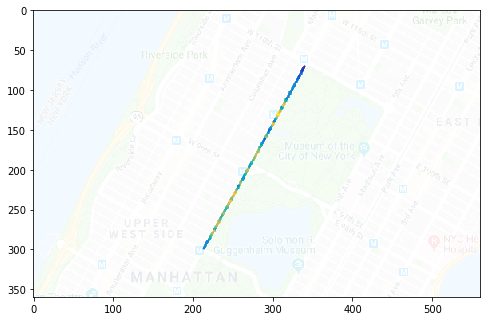

In [93]:
gfiles = glob('../data/graphs/*_n5.json')
assert len(gfiles)
for fname in gfiles[:10]:
    vs, adj = read_graph(fname, named_adj=True, verbose=False)
    cmap = {}
    c1 = np.array(rgb_to_hsv(0, 255, 125))
    c2 = np.array(rgb_to_hsv(255, 255, 0))
#     print(c1, c2)
    cmax = 25
    ints = {}
    for vert in vs:
        ratio = 1- min(1, np.random.randint(0, 25) / cmax)
        ints[vert] = ratio
    try:
        map_graph('demo', vs, adj, ints, zoom=14, wait=3, opacity=0.85, crop=120, show=True)
    except MaxRetryError:
        print('RetryError:', fname)
    break